# Problem #1 Image Transformations

1‐1. Translation, Rotation, Affine/Perspective Transformation 행렬을 구해보세요. 이 때, 각 행렬의 파라
미터는 자유롭게 설정하세요. 그리고, 구성한 행렬을 OpenCV Library의 cv2.warpAffine 함수를 이
용하여 임의의 이미지에 적용해 변형해보세요.

In [10]:
!pip install opencv-python
import numpy as np
import cv2
import random
import math
import matplotlib.pyplot as plt

In [39]:
def translate(image, x, y):
    # Write your code
    rows,cols = img.shape
    translation_matrix = np.float32([[1 ,0, x],
                                     [0, 1, y]])
    
    transformed_image = cv2.warpAffine(image,translation_matrix,(cols, rows))

    return transformed_image

def rotate(image, angle):
    # Write your code
    rows,cols = img.shape
    a = np.cos(math.pi*(angle/180))
    b = np.sin(math.pi*(angle/180))
    centerx = (cols-1)/2
    centery = (rows-1)/2
    
    transform_matrix = np.array([[a, b, (1-a)*centerx - b*centery],
                                 [-b, a, b*centerx + (1-a)*centery]])

    transformed_image = cv2.warpAffine(image,transform_matrix,(cols, rows))

    return transformed_image

def AffineTransformation(image, point1, point2):
    # Write your code
    rows,cols = img.shape
    point1 = np.array(point1)
    point1 = np.append(point1, [[1],[1],[1]], axis=1)

    transform_matrix = np.linalg.solve(point1, point2).T

    transformed_image = cv2.warpAffine(image, transform_matrix, (cols, rows))

    return transformed_image

def PerspectiveTransformation(image, point1, point2):
    # Write your code
    transform_matrix = cv2.getPerspectiveTransform(point1, point2)
    transformed_image = cv2.warpPerspective(image, transform_matrix, (cols, rows))

    return transformed_image

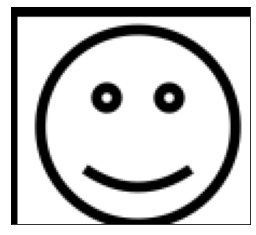

In [12]:
img = cv2.imread('smile.png', 0)

translation = translate(img,3, 5)

cv2.imwrite('translation.jpg', translation)

plt.imshow(translation, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

Translate

이미지를 x축과 y축 방향으로 이동시키는 translation 함수를 만들었으며, 이때 입력 파라미터를 변형시킬 이미지와 x축 방향으로 이동시킬 변수, y축 방향으로 이동시킬 변수로 설정하였다. 그 후 변형된 이미지를 .jpg 파일로 저장하고 출력한다.

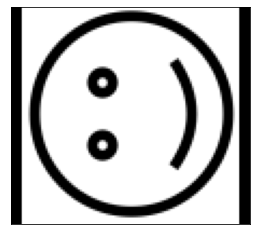

In [13]:
img = cv2.imread('smile.png', 0)

rotation = rotate(img,90)

cv2.imwrite('rotation.jpg', rotation)

plt.imshow(rotation, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

Rotate

이미지를 각도에 따라 반시계 방향으로 회전시키는 rotate 함수를 만들었으며, 이때 입력 파라미터를 변형시킬 이미지와 회전할 각도를 변수로 설정하였다. 그 후 변형된 이미지를 .jpg 파일로 저장하고 출력한다.

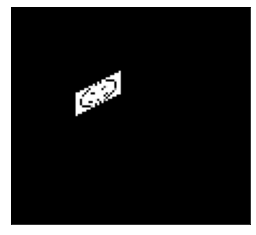

In [14]:
img = cv2.imread('smile.png', 0)

rows,cols = img.shape

pts1 = [[0,0], [cols-1, 0], [0, rows-1]]
pts2 = [[30,40],[50,30],[30,50]]
affine = AffineTransformation(img,pts1, pts2)

cv2.imwrite('affine.jpg', affine)


plt.imshow(affine, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

AffineTransformation

평행성은 유지가 되면서 이미지를 변환하는 함수를 만들었으며, 이때 Affine 변형의 DOF가 6 이므로, 입력 파라미터를 변형시킬 이미지와 변환할 좌표 포인트 3개, 변환 후 좌표 포인트 3개를 변수로 설정하였다. 그 후 변형된 이미지를 .jpg 파일로 저장하고 출력한다.

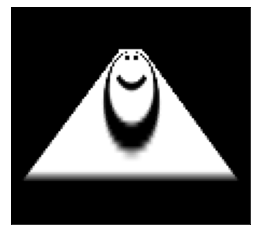

In [41]:
img = cv2.imread('smile.png', 0)
rows,cols = img.shape

pts1 = np.float32([[0,0], [0, rows], [cols, 0], [cols, rows]])
pts2 = np.float32([[50, 20],[5, rows-20],[cols-50, 20],[cols-5, rows-20]])

perspective = PerspectiveTransformation(img,pts1, pts2)

cv2.imwrite('perspective.jpg', perspective)

plt.imshow(perspective, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

PerspectiveTransformation

이미지에 원근법 변환(Perspective Tranform)을 적용하는 함수를 만들었으며, 이때 Perspective 변형의 DOF가 8이므로 입력 파라미터를 변형시킬 이미지와 변환할 좌표 포인트 4개, 변환 후 좌표 포인트 4개를 변수로 설정하였다. 그 후 변형된 이미지를 .jpg 파일로 저장하고 출력한다.

# Problem #2 Linear Filters

# #2‐1
OpenCV Library를 이용하여 Gaussian Filter를 임의의 이미지에 적용해보세요. 이 때, 필터의 크기/분산은 자유롭게 정해보세요.

In [16]:
def Gaussian_blur(image):
    # Write your code
    result = cv2.GaussianBlur(image, (5,5), 3)

    return result

In [17]:
img = cv2.imread('lenna.png', 0)

gb_result = Gaussian_blur(img)

cv2.imwrite('GaussianBlurLenna.jpg', gb_result)

True

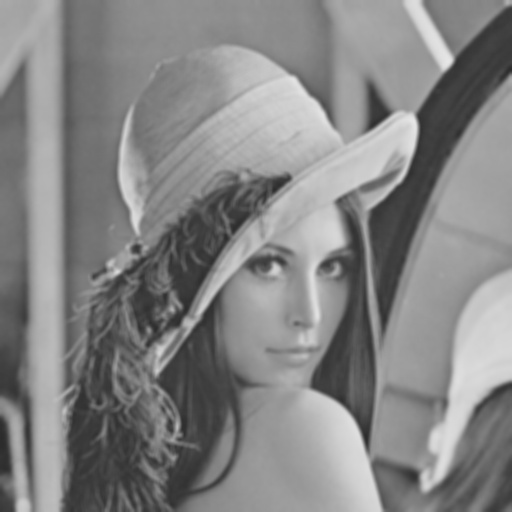

Gaussian Filter

이미지에 가우시안 필터를 적용하여 변형시키는 함수를 만들었으며, 이때 가우시안 필터의 커널의 사이즈는 5x5, x 방향 시그마와 y 방향 시그마를 3 으로 설정했다.

# #2‐2
OpenCV Library를 이용하여 Sobel Filter와 Laplacian Filter를 임의의 이미지에 적용해보세요. 이 때, 필터의 파라미터는 자유롭게 정해보세요.

In [18]:
def Sobel(image):
    # Write your code
    # Set any parameters for the kernel
    
    resultx = cv2.Sobel(image, -1, 1, 0, ksize = 3)
    resulty = cv2.Sobel(image, -1, 0, 1, ksize = 3)

    return [resultx, resulty]

def Laplacian(image):
    # Write your code
    # Set any parameters for the kernel
    
    result = cv2.Laplacian(image,-1, ksize=5)

    return result

In [19]:
img = cv2.imread('lenna.png', 0)

sb_resultx, sb_resulty = Sobel(img)

cv2.imwrite('SoberLennax.jpg', sb_resultx)
cv2.imwrite('SoberLennay.jpg', sb_resulty)

True

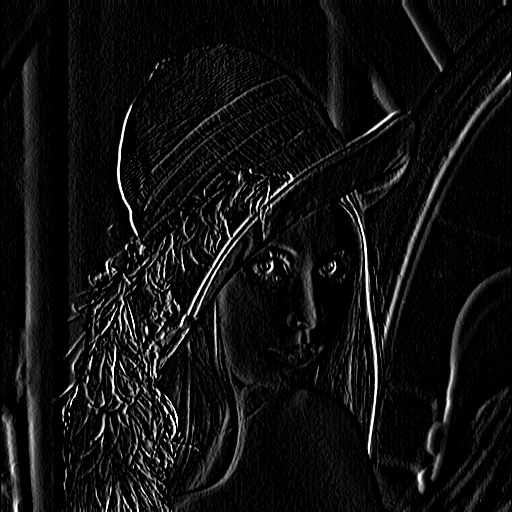

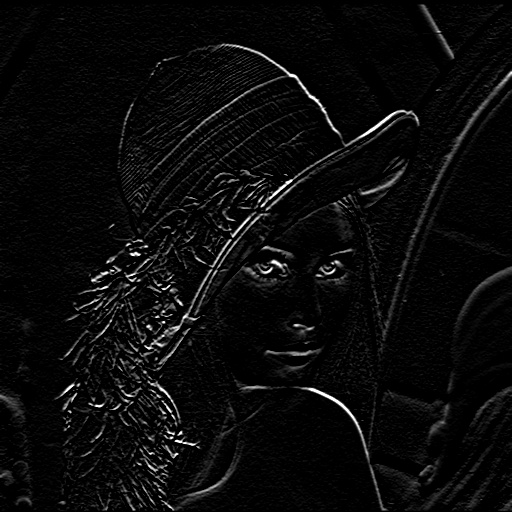

Sober Filter

이미지에 소벨 필터를 적용하여 변형시키는 함수를 만들었으며, 이때 소벨 필터의 커널의 사이즈는 3x3, ddepth는 -1로, 입력 이미지와 같은 데이터 타입을 사용하도록 했다. 첫번째 필터는 x 방향으로 미분하여 이미지를 변형시키고, 두번쨰 필터는 y 방향으로 미분하여 이미지를 변형시켰다.

In [20]:
img = cv2.imread('lenna.png', 0)

lp_result = Laplacian(img)

cv2.imwrite('LaplacianLenna.jpg', lp_result)

True

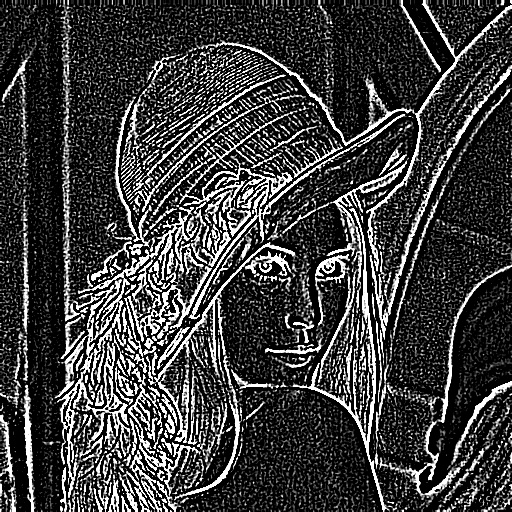

Laplacian Filter

이미지에 라플라시안 필터를 적용하여 변형시키는 함수를 만들었으며, 이때 라플라시안 필터의 커널의 사이즈는 5x5, ddepth는 -1로, 입력 이미지와 같은 데이터 타입을 사용하도록 했다. 

# #2‐3

임의의 이미지에 Salt and Pepper Noise를 추가하고, 앞서 구현한 Gaussian Filter, Sobel Filter, Laplacian Filter를 적용해보고, Noise가 감소 / 증가 하였는지 분석해보세요.

In [21]:
def add_salt_pepper_noise(image, prob):
    # You can use prob argument as the probability of noise at each pixel
    result = np.zeros(image.shape, np.uint8)
    th = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rand = random.random()
            if rand < prob:
                result[i][j] = 0
            elif rand > th:
                result[i][j] = 255
            else:
                result[i][j] = image[i][j]
    return result

# Write your code
# GaussianBlur, Sobel, and Laplacian to the result image with noise
image = cv2.imread('lenna.png', 0)
noise = add_salt_pepper_noise(image, 0.01)
gb_result = Gaussian_blur(noise)
sb_result = Sobel(noise)
lp_result = Laplacian(noise)

cv2.imwrite('NoiseLenna.jpg', noise)
cv2.imwrite('GaussianNoiseLenna.jpg', gb_result)
cv2.imwrite('SobelNoiseLennax.jpg', sb_result[0])
cv2.imwrite('SobelNoiseLennay.jpg', sb_result[1])
cv2.imwrite('LaplacianNoiseLenna.jpg', lp_result)

True

Noise
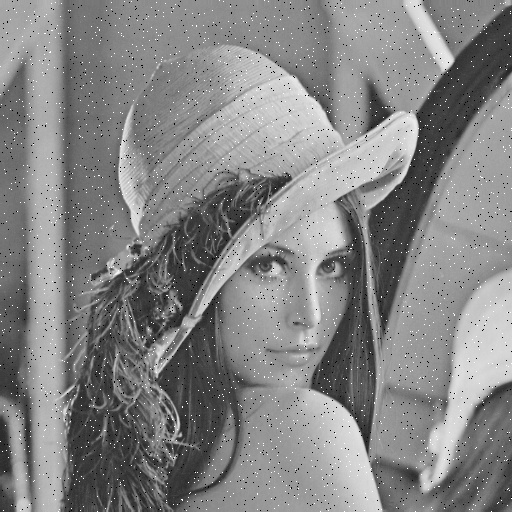

Gaussian Filter
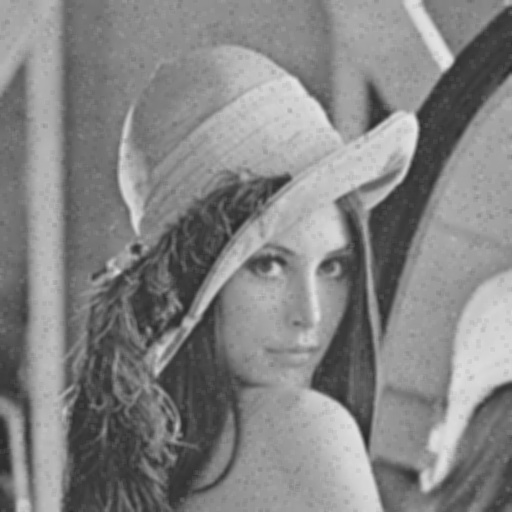

Sobel Filter 1
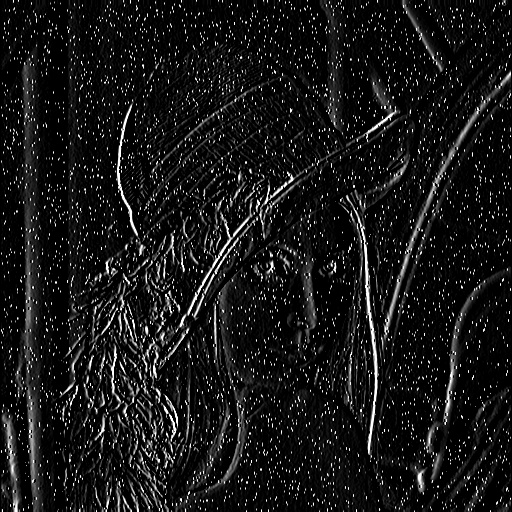

Sobel Filter 2
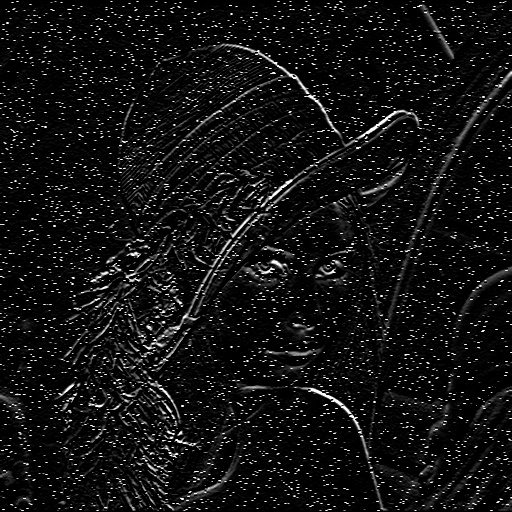

Laplacian Filter
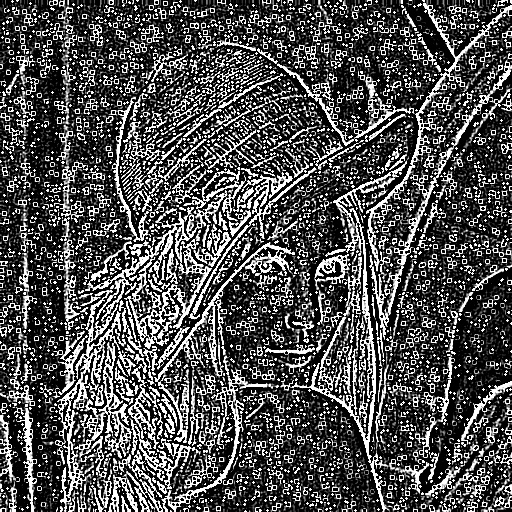

원본 이미지에 확률을 0.01로 설정하여 노이즈를 더하였을 때 가우시안 필터를 적용한 경우 노이즈가 주변 픽셀과 어우러져 감소하였음을 볼 수 있다. 반면에 노이즈를 추가한 이미지에 소벨 필터와 라플라시안 필터를 적용했을 경우, 노이즈의  에지를 감지하여 오히려 노이즈가 증가하였음을 볼 수 있다.

# #2-4
앞서 Salt and Pepper Noise가 추가된 이미지에 cv2.medianBlur 함수를 이용하여 Median Filter를 적용시켜 보세요. 그리고, 2‐3에서의 Filter들의 결과와 비교해보세요.

In [22]:
def median_blur(image):
    # Write your code
    # You can use cv2.medianBlur
    # Choose various sizes of the filter
    filter3 = cv2.medianBlur(image, 3)
    filter5 = cv2.medianBlur(image, 5)
    filter7 = cv2.medianBlur(image, 7)

    return [filter3, filter5, filter7]

In [23]:
noise = cv2.imread('noise.jpg', 0)

md_result = median_blur(noise)

cv2.imwrite('MedianBlurLenna3.jpg', md_result[0])
cv2.imwrite('MedianBlurLenna5.jpg', md_result[1])
cv2.imwrite('MedianBlurLenna7.jpg', md_result[2])

True

Median Blur (3x3)
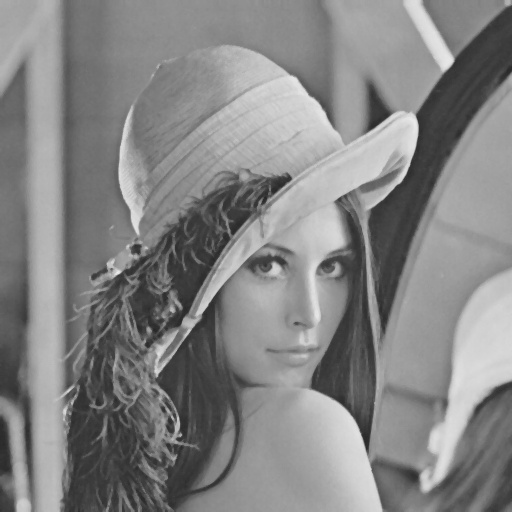

Median Blur (5x5)
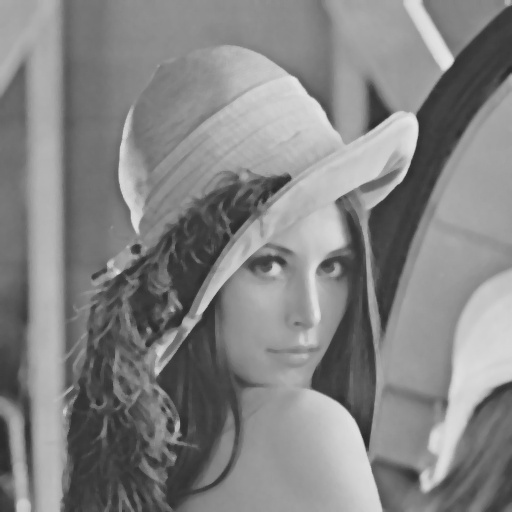

Median Blur (7x7)
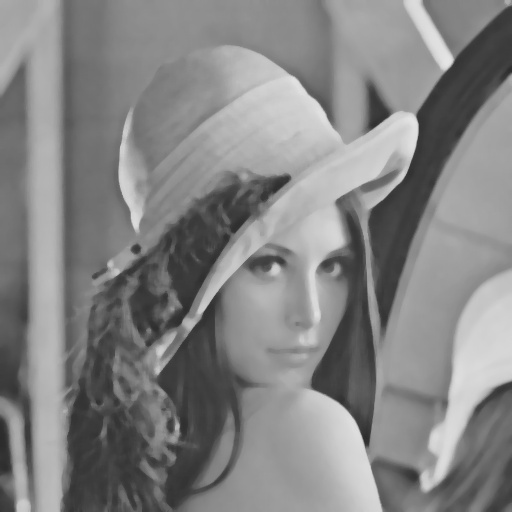

노이즈가 있는 이미지에 미디안 필터를 적용하는 경우, 앞선 가우시안 필터와 소벨 필터, 라플라시안 필터보다 더 smooth하게 노이즈를 감소시키는 것을 볼 수 있는데, 이때 필터의 커널 크기에 따라 이미지의 블러 정도가 달라지는 것 또한 볼 수 있다. 

# Problem #3 Image Pyramids

# #3-1
임의의 이미지를 가지고, OpenCV Library의 cv2.resize 함수를 이용하여 Up‐sampling과 Downsampling을 적용해보세요. 이 때, Interpolation의 여러 방식(예를 들어, Bi‐linear, Cubic 등)을 적용시켜보고 결과에 대한 비교를 설명해보세요.

In [24]:
# Use cv2.resize() and its argument "interpolation=..."
# Try different options of interpolation

# Write your code
# To down-sample an image, you should set the size smaller than the image
down_result_01 = cv2.resize(image, (64,64), interpolation=cv2.INTER_NEAREST)
down_result_02 = cv2.resize(image, (64,64), interpolation=cv2.INTER_LINEAR)
down_result_03 = cv2.resize(image, (64,64), interpolation=cv2.INTER_CUBIC)

# Write your code
# To up-sample an image, you should set the size lager than the image
up_result_01 = cv2.resize(image, (2048, 2048), interpolation=cv2.INTER_NEAREST)
up_result_02 = cv2.resize(image, (2048, 2048), interpolation=cv2.INTER_LINEAR)
up_result_03 = cv2.resize(image, (2048, 2048), interpolation=cv2.INTER_CUBIC)



cv2.imwrite('DownResult_01.jpg', down_result_01)
cv2.imwrite('DownResult_02.jpg', down_result_02)
cv2.imwrite('DownResult_03.jpg', down_result_03)

cv2.imwrite('UpResult_01.jpg', up_result_01)
cv2.imwrite('UpResult_02.jpg', up_result_02)
cv2.imwrite('UpResult_03.jpg', up_result_03)

True

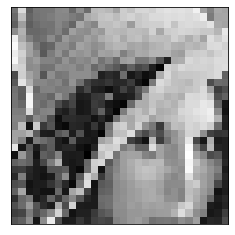

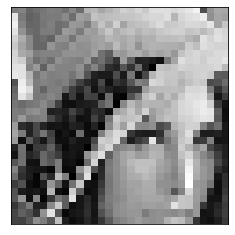

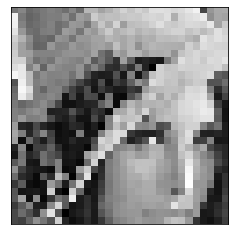

In [25]:
#Downsampling

plt.imshow(down_result_01[15:45, 15:45], cmap='gray') #interpolation=cv2.INTER_NEAREST
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(down_result_02[15:45, 15:45], cmap='gray') #interpolation=cv2.INTER_LINEAR
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(down_result_03[15:45, 15:45], cmap='gray') #interpolation=cv2.INTER_CUBIC
plt.xticks([]), plt.yticks([])
plt.show()

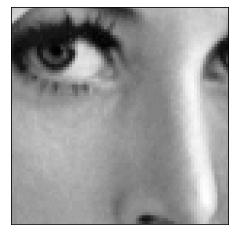

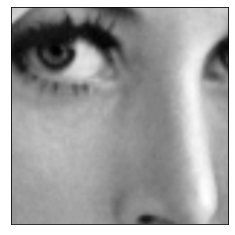

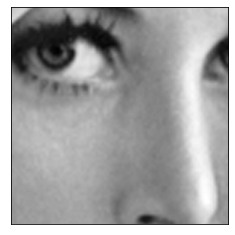

In [26]:
#upsampling

plt.imshow(up_result_01[1000:1300, 1000:1300], cmap='gray') #interpolation=cv2.INTER_NEAREST
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(up_result_02[1000:1300, 1000:1300], cmap='gray') #interpolation=cv2.INTER_LINEAR
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(up_result_03[1000:1300, 1000:1300], cmap='gray') #interpolation=cv2.INTER_CUBIC
plt.xticks([]), plt.yticks([])
plt.show()

다운 샘플링과업 샘플링 과정에서 Nearest neighbor interpolation, Bilinear interpolation, Bicubic interpolation을 사용하여 interpolation 방법을 비교해보았다. Nearest neighbor interpolation을 적용한 경우 다운 샘플링하였을 때는 이미지의 information loss가 가장 많으며 업 샘플링했을 경우 큐브 형식으로 이미지가 형성되는 것을 볼 수 있었다. Bilinear interpolation을 적용한 경우, 다운 샘플링하였을 때 Nearest neighbor interpolation로 다운 샘플링한 이미지보다 information loss가 적었으며, Nearest neighbor interpolation로 업 샘플링한 이미지보다 더 smooth하게 이미지가 형성되었다. 그러나  Bicubic interpolation한 업 샘플링과 비교했을 때 보다 blur하게 이미지가 형성되었다. Bicubic interpolation을 적용한 경우 다운 샘플링에 있어서 3가지 interpolation 방식 중 가장 information loss가 적으며 업 생플링했을 때 가장 smooth 하면서 에지가 뚜렷하게 유지된 이미지를 형성했다.

# #3-2
임의의 이미지를 가지고 OpenCV Library의 pyrDown 함수를 이용하여 Gaussian Pyramid 를 구성해보세요. 그리고, 이미지들의 퀄리티와 용량을 비교해보세요.

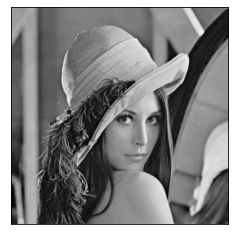

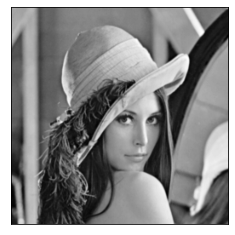

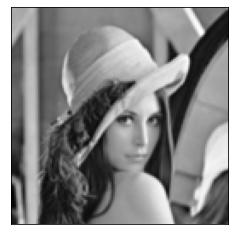

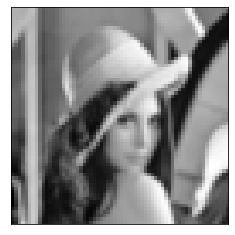

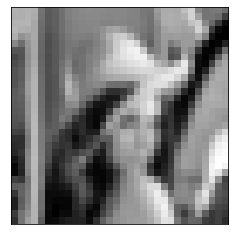

File Size: 82335 bytes
File Size: 20014 bytes
File Size: 6298 bytes
File Size: 2140 bytes
File Size: 843 bytes


In [27]:
import os

image = cv2.imread('lenna.png', 0)
Gaussian_00 = image
Gaussian_01 = cv2.pyrDown(Gaussian_00)
Gaussian_02 = cv2.pyrDown(Gaussian_01) # You should use Gaussian_01 as the input
Gaussian_03 = cv2.pyrDown(Gaussian_02)# You can repeat
Gaussian_04 = cv2.pyrDown(Gaussian_03)

plt.imshow(Gaussian_00, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(Gaussian_01, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(Gaussian_02, cmap='gray') 
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(Gaussian_03, cmap='gray') 
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(Gaussian_04, cmap='gray') 
plt.xticks([]), plt.yticks([])
plt.show()


cv2.imwrite('Gaussian_00.jpg', Gaussian_00)
cv2.imwrite('Gaussian_01.jpg', Gaussian_01)
cv2.imwrite('Gaussian_02.jpg', Gaussian_02)
cv2.imwrite('Gaussian_03.jpg', Gaussian_03)
cv2.imwrite('Gaussian_04.jpg', Gaussian_04)

for i in range(5):
    file_size = os.path.getsize('./Gaussian_0%d.jpg'%i) 
    print('File Size:', file_size, 'bytes')


OpenCV Library의 pyrDown 함수를 이용하여 다운 샘플링을 했을 때 점점 이미지의 information loss가 많아지고 퀄리티가 떨어졌으며, 이미지 파일의 용량이 약 4배에서 3배씩 감소했다.

# Problem #4 Median Blur

In [34]:
def my_median_blur(image, size):
    # Write your code
    # You can use any library for sorting like numpy.sort()
    # You do not have to consider the issue of padding
    rows,cols = noise.shape
    size = 3
    new_r, new_c = rows-(size//2)-1, cols-(size//2)-1

    result = np.zeros((new_r, new_c))
    for i in range(new_r):
        for j in range(new_c):
            temp = image[i:i+size,j:j+size]
            mid = np.sort(temp.flatten())
            mid = mid[(size**2)//2]
            result[i,j] = mid

    return result

In [35]:
noise = cv2.imread('noise.jpg', 0)
md_result = my_median_blur(noise, 3)

cv2.imwrite('MyMedianBlur.jpg', md_result)

True

In [36]:
error = md_result - cv2.medianBlur(noise,3)[1:511, 1:511]

print(f'Error: {error.sum()}')

Error: 0.0


My Median Blur (3x3)
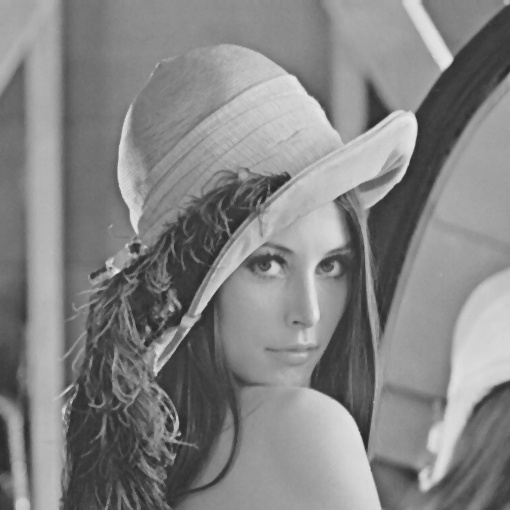

cv2.medianblur (3x3)
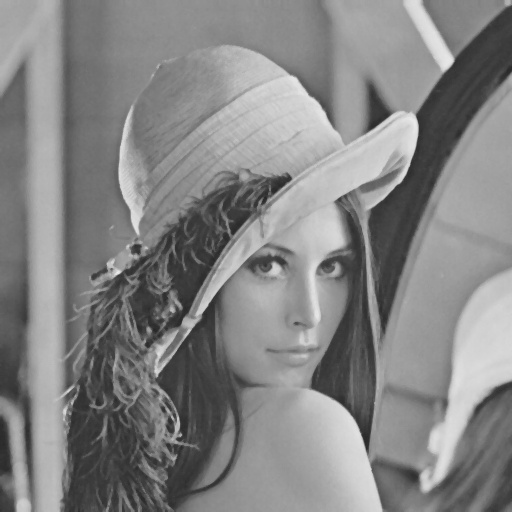

Padding 과정을 거치지 않고 median blur를 이미지에 적용하는 함수 my_median_blur를 만들어 3x3 커널을 사용해 필터를 적용한 이미지와 cv2.medianBlur를 적용한 이미지를 비교하였을 때 error가 0으로 각각 변형된 두 이미지가 똑같다는 것을 알 수 있다. 이때, my_median_blur의 경우 padding을 적용하지 않았기 때문에 이미지의 크기가 510x510 이므로 cv2.medianBlur의 이미지 역시 높이와 너비를 조절해준다.